First 10 rows of the dataset:
      User ID  Gender  Age  EstimatedSalary  Purchased
182  15694288  Female   32           117000          1
213  15657163    Male   35            58000          0
302  15720745  Female   37           137000          1
255  15750056  Female   52            90000          1
10   15570769  Female   26            80000          0
169  15579781  Female   29            47000          0
334  15814553    Male   57            60000          1
207  15794566  Female   52           114000          0
106  15706185  Female   26            35000          0
252  15795298  Female   48           134000          1

Shape of the dataset:
(400, 5)

Summary statistics of the dataset:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0

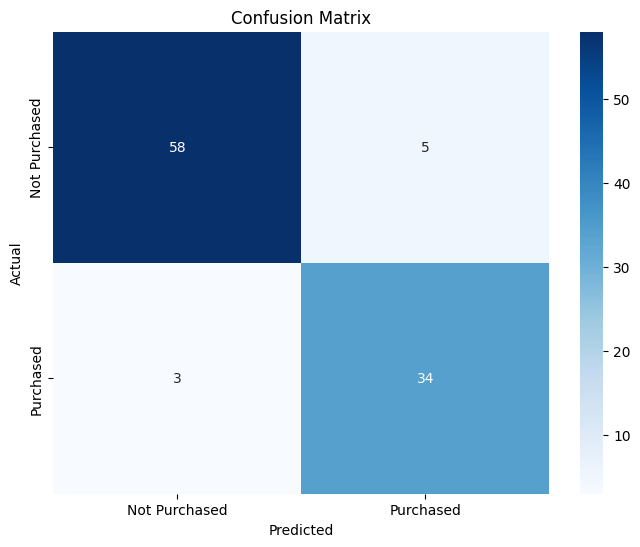

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.sample(10))

# Show the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Show summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Show information about the dataset including data types and non-null counts
print("\nDataset information:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Mapping the 'Gender' column to numerical values and storing it as 'Gender Mapping'
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender Mapping'] = df['Gender'].map(gender_mapping)

# Drop 'User ID' and 'Gender' columns
df = df.drop(['User ID', 'Gender'], axis=1)

# Define features (X) and target (y)
X = df[['Gender Mapping', 'Age', 'EstimatedSalary']]  # Use 'Gender Mapping' as a feature
y = df['Purchased']  # 'Purchased' is the target variable


# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the K-Nearest Neighbors classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Print classification report (which includes precision, recall, f1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute accuracy and error rate
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

# Print accuracy and error rate
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### What is K-Nearest Neighbors (KNN)?

**K-Nearest Neighbors (KNN)** is a simple, non-parametric, and instance-based machine learning algorithm used for classification and regression tasks. It works by making predictions based on the similarity (distance) between the data points. 

#### How does KNN work?

1. **Training Phase**: 
   - In KNN, there is no explicit training phase. The algorithm simply stores the training data and relies on it to make predictions during the testing phase.

2. **Prediction Phase**:
   - To predict the label of a new data point (test sample), KNN:
     1. **Measures the distance** between the test data point and all the points in the training set (usually using Euclidean distance or other distance metrics).
     2. Selects the **k-nearest neighbors** (the closest data points).
     3. For **classification**: It assigns the most common class label among the k-nearest neighbors.
     4. For **regression**: It takes the average (or weighted average) of the values of the k-nearest neighbors.
   
3. **Choosing the Number of Neighbors (k)**:
   - The parameter **k** determines how many neighbors the algorithm considers. A small value of **k** makes the model more sensitive to noise, while a large value of **k** makes it smoother but might ignore smaller patterns in the data.
   - Typically, an odd value for **k** is used in classification to avoid ties between two classes.

#### Example:
If you're predicting whether a person will buy a product based on their age and salary, and you have the information for 100 customers, KNN will:
- Find the closest neighbors in terms of age and salary to the new customer.
- Predict the label ("purchased" or "not purchased") based on the most frequent label among the nearest neighbors.

---

### Why Use KNN?

Here are some reasons why KNN might be chosen for certain tasks:

1. **Simple and Intuitive**:
   - KNN is one of the simplest machine learning algorithms. It doesn't require any assumptions about the data or complex training steps.
   - It is easy to understand because it classifies data based on how similar it is to its neighbors.

2. **No Training Phase**:
   - KNN is a **lazy learner**. It doesn’t require a training phase like many other algorithms (such as decision trees or support vector machines). Instead, it just stores the data and makes predictions on-the-fly.

3. **Works Well with Small Datasets**:
   - KNN works well when you have a smaller dataset where computing distances between data points is manageable.

4. **Versatile**:
   - It can be used for both **classification** (predicting discrete labels) and **regression** (predicting continuous values).
   
5. **Adaptable to Multi-Class Problems**:
   - KNN is well-suited for **multi-class classification** problems, unlike some other algorithms that require additional handling for more than two classes.

---

### Limitations of KNN

While KNN has many advantages, it also has some drawbacks:

1. **Computationally Expensive**:
   - KNN can be slow for large datasets because it needs to compute the distance between the test point and all training points, which can be time-consuming.
   
2. **Sensitive to Irrelevant Features**:
   - KNN works on distance calculations, and irrelevant or redundant features can affect the performance because they can distort the distance measure.

3. **Feature Scaling**:
   - KNN is sensitive to the scale of the features. Features with larger numerical ranges can dominate the distance calculation. This is why **feature scaling** (e.g., using StandardScaler) is important.

4. **Storage Requirements**:
   - Since KNN stores all the training data, it requires a lot of memory for large datasets.

---

### When to Use KNN?

You might choose KNN for the following reasons:
- **Small to medium-sized datasets** where computational efficiency is not a major concern.
- **Simple classification problems** where you don't need to build a complex model.
- **Data with clear similarity-based patterns** where the relationship between features and labels can be described by proximity (distance).

KNN is ideal when you don't have a lot of prior knowledge about the data, and you need a model that can adapt quickly and easily to new data. However, for very large datasets or when interpretability is critical, other models like decision trees or support vector machines may be more appropriate.

### **Explanation and Summary of the Code**

This code implements a **K-Nearest Neighbors (KNN)** classification model on a dataset of social network advertisements to predict whether a user purchased a product based on their age, estimated salary, and gender. The key steps in the code are as follows:

### **Steps in the Code:**

1. **Importing Libraries:**
   - The code imports various libraries needed for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), machine learning (`sklearn`), and metrics computation (`sklearn.metrics`).

2. **Loading the Dataset:**
   - The dataset `Social_Network_Ads.csv` is loaded using `pandas.read_csv()` into a DataFrame called `df`.
   
3. **Data Exploration:**
   - **First 10 rows:** `df.sample(10)` displays 10 random rows from the dataset.
   - **Shape:** `df.shape` shows the number of rows and columns in the dataset.
   - **Summary Statistics:** `df.describe()` provides basic statistics like mean, standard deviation, min, max, and percentiles for numerical columns.
   - **Dataset Info:** `df.info()` gives the data types and non-null count of each column.
   - **Missing Values:** `df.isnull().sum()` checks if there are any missing values in the dataset.

4. **Data Preprocessing:**
   - **Mapping Gender to Numerical Values:** The 'Gender' column is mapped to `1` for "Male" and `0` for "Female" using a dictionary and stored in a new column called `'Gender Mapping'`.
   - **Dropping Unnecessary Columns:** The `'User ID'` and `'Gender'` columns are dropped, as they are not needed for model training.
   
5. **Defining Features (X) and Target (y):**
   - The feature variables `X` include `'Gender Mapping'`, `'Age'`, and `'EstimatedSalary'`.
   - The target variable `y` is the `'Purchased'` column, which indicates whether the user made a purchase.

6. **Splitting Data:**
   - The data is split into **training** (75%) and **testing** (25%) sets using `train_test_split()`. This ensures that the model is trained on one portion of the data and evaluated on another unseen portion.

7. **Standardization:**
   - **StandardScaler** is used to standardize the feature variables (i.e., bring them to the same scale) so that no feature dominates due to differing units. The scaler is fitted on the training data and then applied to both the training and testing sets.

8. **Training the Model:**
   - The **K-Nearest Neighbors (KNN)** classifier is initialized with `n_neighbors=5` (i.e., the model will consider the 5 nearest neighbors to classify the data).
   - The model is trained on the standardized training data using the `fit()` method.

9. **Making Predictions:**
   - The trained KNN model is used to predict the target variable `y_pred` on the test data.

10. **Model Evaluation:**
    - **Confusion Matrix:** The confusion matrix is computed to evaluate the model's performance by showing the true positives, true negatives, false positives, and false negatives.
    - **Classification Report:** The `classification_report()` function is used to display a summary of precision, recall, F1-score, and support (the number of occurrences of each class).
    - **Accuracy and Error Rate:** The `accuracy_score()` computes the accuracy of the model, and the error rate is simply `1 - accuracy`.

11. **Visualization:**
    - A heatmap of the confusion matrix is plotted using **Seaborn** to visualize how well the model is performing in terms of true and false classifications for the two classes ("Purchased" vs. "Not Purchased").

### **Summary:**
- **Objective:** The goal of this code is to use the K-Nearest Neighbors (KNN) algorithm to predict whether a user will purchase a product based on their gender, age, and estimated salary.
- **Preprocessing:** The gender column is encoded to numerical values, unnecessary columns are dropped, and features are standardized before training the model.
- **Model Evaluation:** After training the KNN model, it is evaluated using the confusion matrix and several metrics such as accuracy, error rate, precision, recall, and F1-score. The results are visualized using a confusion matrix heatmap.
- **Key Metrics:**
  - **Accuracy:** Percentage of correct predictions.
  - **Precision:** How many of the predicted "Purchased" were actually "Purchased".
  - **Recall:** How many of the actual "Purchased" were predicted correctly.
  - **Error Rate:** The proportion of incorrect predictions.
  - **Confusion Matrix:** A matrix showing how well the model distinguishes between the two classes ("Purchased" and "Not Purchased").

By evaluating the model using these metrics, we can understand its performance and determine whether it is a good classifier for this dataset.